# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

Here's a video I made explaining all the math and showing my progress as I coded the network: https://youtu.be/w8yWXqWQYmU

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # make sure each column is an data piece
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

m_train

41000

In [6]:
Y_train

array([5, 4, 9, ..., 4, 9, 1])

In [38]:

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [46]:
class Network:
    def __init__(self, sizes) -> None:
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = []
        self.weights = []

        for i in sizes[1:]:
            self.biases.append(np.random.randn(i, 1))
        for i, j in zip(sizes[:-1], sizes[1:]):
            self.weights.append(np.random.randn(i, j))
        
    def forward_prop(self, X):
 # save Z and A arrays for backprop
        for b, w in zip(self.biases[:-1], self.weights[:-1]):
            X = np.dot(w.T, X) + b
            X = ReLU(X)
        X = np.dot(self.weights[-1], X) + self.biases[-1]
        X = softmax(X)
        return X
        
    def backward_prop(self, X, Y):
        one_hot_Y = one_hot(Y)

        Z = []
        A = []
        for b, w in zip(self.biases[:-1], self.weights[:-1]):
            X = np.dot(w.T, X) + b
            Z.append(X)
            X = ReLU(X)
            A.append(X)
        X = np.dot(self.weights[-1], X) + self.biases[-1]
        Z.append(X)
        X = softmax(X)
        A.append(X)

        dZ = []
        dA = []
        dW = []
        dB = [] 
        for z, a in zip(Z, A):




network = Network([784, 10, 10])

sum(network.forward_prop(X_train[:, [0]]))

# X_train[:, [0]].shape

array([1.])

TypeError: forward_prop() missing 4 required positional arguments: 'b1', 'W2', 'b2', and 'X'

In [12]:
# W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

~85% accuracy on training set.

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [8]
Label:  8


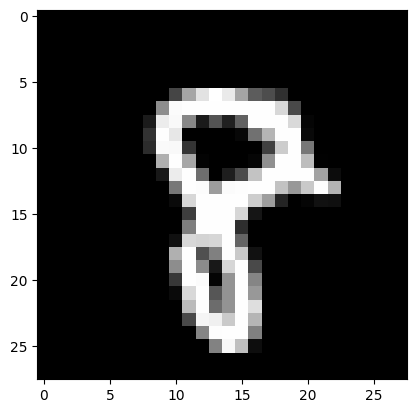

Prediction:  [2]
Label:  2


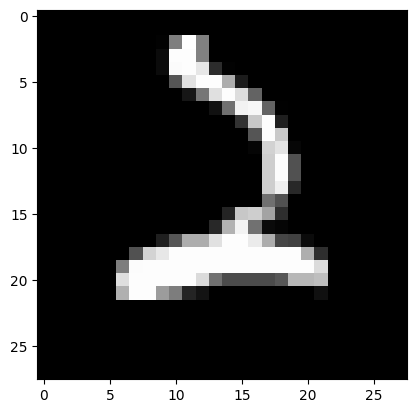

Prediction:  [2]
Label:  2


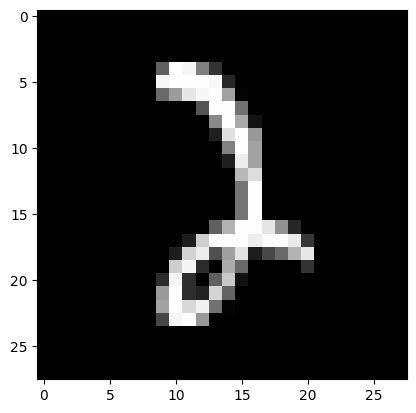

Prediction:  [4]
Label:  4


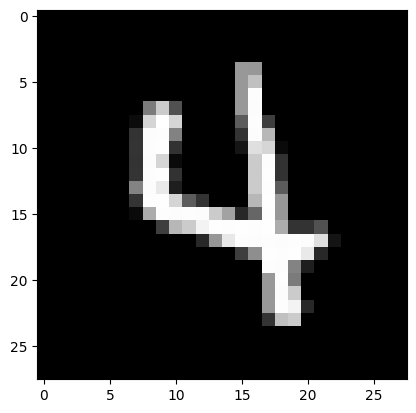

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 2 8 4 1 7 2 4 4 0 3 7 0 6 0 7 9 8 6 2 9 0 8 8 2 0 8 9 8 0 0 4 0 9 9 7 8
 6 2 7 7 5 1 9 5 1 1 2 8 0 2 7 3 7 0 5 7 8 5 0 0 9 9 1 0 4 9 0 2 0 8 5 4 7
 6 9 4 6 0 2 8 9 4 6 8 5 9 9 2 1 8 9 3 2 4 1 7 6 3 7 4 1 2 7 3 0 2 1 3 7 4
 6 8 9 5 1 0 6 9 1 2 3 1 4 0 7 4 9 5 4 0 7 4 4 4 4 5 0 0 3 3 3 8 9 8 5 0 5
 0 7 3 9 1 6 2 4 3 5 0 5 0 4 8 8 3 9 4 1 2 0 3 3 9 6 4 7 3 3 5 9 2 1 7 6 1
 9 7 9 4 6 7 5 9 6 5 7 6 7 7 6 3 1 8 2 8 8 1 0 6 5 9 9 5 6 8 6 0 9 2 6 1 9
 8 8 9 7 0 8 2 0 5 6 6 4 9 1 7 2 6 3 7 0 3 3 0 0 4 0 1 8 7 3 1 5 1 7 1 9 2
 7 2 5 5 1 3 5 5 1 5 9 7 5 9 6 9 7 2 3 1 2 0 1 2 6 3 8 4 5 0 0 8 1 2 6 3 3
 1 3 7 6 8 3 6 8 4 9 8 0 3 8 5 4 3 4 7 4 0 0 9 7 7 5 3 5 7 9 1 5 2 6 4 9 7
 1 3 0 7 5 1 7 0 6 1 9 0 4 6 5 2 2 3 9 0 8 5 4 8 3 2 5 3 8 8 1 2 0 1 0 4 4
 1 2 6 8 7 1 3 4 7 5 3 7 0 5 9 7 4 4 1 1 6 4 1 3 4 0 9 9 2 3 2 0 9 0 4 8 0
 4 8 4 3 0 4 9 8 3 8 4 0 0 1 8 4 5 6 0 1 7 0 3 3 2 7 5 1 9 7 4 6 3 8 9 0 6
 6 4 0 8 0 4 9 8 1 0 0 0 5 4 6 3 3 2 9 9 6 1 1 5 2 6 7 4 4 5 5 6 4 3 3 0 1
 0 7 0 3 4 8 5 0 1 8 1 6 

np.float64(0.845)

Still 84% accuracy, so our model generalized from the training data pretty well.